## Solar plat output prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from matplotlib import rcParams
# apply some styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (16, 8)

In [2]:
weather_df = pd.read_csv('weather.csv')

In [3]:
weather_df.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Pashan, Pune, MH, India",2025-01-01,29.0,16.1,22.0,28.9,16.1,22.0,15.8,70.6,...,18.5,8,10,2025-01-01T07:07:20,2025-01-01T18:09:40,0.05,Clear,Clear conditions throughout the day.,clear-day,"43063099999,43111099999,remote,43067099999,430..."
1,"Pashan, Pune, MH, India",2025-01-02,30.8,14.9,22.1,29.3,14.9,21.9,13.6,63.1,...,18.8,8,10,2025-01-02T07:07:40,2025-01-02T18:10:17,0.08,Clear,Clear conditions throughout the day.,clear-day,"43063099999,43111099999,remote,43060099999"
2,"Pashan, Pune, MH, India",2025-01-03,29.3,12.9,21.0,27.7,12.9,20.7,10.4,56.5,...,19.2,8,10,2025-01-03T07:07:59,2025-01-03T18:10:54,0.12,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43063099999,43111099999,remote,43060099999"
3,"Pashan, Pune, MH, India",2025-01-04,29.8,11.2,20.0,28.5,11.2,19.8,8.6,51.8,...,19.4,8,10,2025-01-04T07:08:17,2025-01-04T18:11:31,0.15,Clear,Clear conditions throughout the day.,clear-day,"43063099999,43111099999,remote,43067099999,430..."
4,"Pashan, Pune, MH, India",2025-01-05,30.1,12.2,20.7,28.5,12.2,20.4,10.2,54.5,...,18.9,8,10,2025-01-05T07:08:33,2025-01-05T18:12:08,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43063099999,43111099999,remote,43067099999,430..."


In [4]:
# Drop unused columns
weather_df = weather_df.drop(['name', 'feelslikemax', 'feelslikemin','feelslike', 'severerisk','moonphase', 'icon', 'stations', 'description', 'preciptype', 'winddir', 'sealevelpressure', 'visibility','uvindex', 'snow', 'snowdepth', 'windgust', 'windspeed', 'conditions'], axis=1)

In [5]:
weather_df.tail(10)

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,sunrise,sunset
142,2025-05-23,25.6,22.8,23.7,22.8,94.9,11.9,100,12.50,98.3,33.6,2.7,2025-05-23T05:58:55,2025-05-23T19:04:34
143,2025-05-24,25.3,21.3,23.3,21.9,92.1,8.0,100,12.50,100.0,42.5,3.7,2025-05-24T05:58:43,2025-05-24T19:04:57
144,2025-05-25,27.1,22.2,23.8,22.9,94.5,29.0,100,25.00,100.0,44.1,3.7,2025-05-25T05:58:32,2025-05-25T19:05:20
145,2025-05-26,27.1,22.1,23.6,22.8,95.4,34.0,100,16.67,99.0,77.5,6.8,2025-05-26T05:58:22,2025-05-26T19:05:42
146,2025-05-27,24.6,20.5,22.9,22.3,96.7,36.0,100,16.67,97.5,70.8,6.1,2025-05-27T05:58:12,2025-05-27T19:06:05
147,2025-05-28,29.0,22.4,24.7,22.5,88.1,7.0,100,4.17,86.8,173.5,14.9,2025-05-28T05:58:04,2025-05-28T19:06:28
148,2025-05-29,31.0,23.0,26.1,22.3,80.5,0.1,100,4.17,86.6,198.0,17.0,2025-05-29T05:57:57,2025-05-29T19:06:50
149,2025-05-30,31.6,22.7,26.1,21.2,75.7,0.3,100,12.50,52.1,298.0,25.8,2025-05-30T05:57:50,2025-05-30T19:07:13
150,2025-05-31,31.6,22.6,26.3,20.2,70.4,0.0,0,0.00,76.8,311.8,27.1,2025-05-31T05:57:45,2025-05-31T19:07:35
151,2025-06-01,28.1,22.0,25.0,20.4,76.5,1.0,100,4.17,85.8,273.6,23.4,2025-06-01T05:57:41,2025-06-01T19:07:57


In [6]:
weather_df.isnull().sum()

datetime          0
tempmax           0
tempmin           0
temp              0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
cloudcover        0
solarradiation    0
solarenergy       0
sunrise           0
sunset            0
dtype: int64

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        152 non-null    object 
 1   tempmax         152 non-null    float64
 2   tempmin         152 non-null    float64
 3   temp            152 non-null    float64
 4   dew             152 non-null    float64
 5   humidity        152 non-null    float64
 6   precip          152 non-null    float64
 7   precipprob      152 non-null    int64  
 8   precipcover     152 non-null    float64
 9   cloudcover      152 non-null    float64
 10  solarradiation  152 non-null    float64
 11  solarenergy     152 non-null    float64
 12  sunrise         152 non-null    object 
 13  sunset          152 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory usage: 16.8+ KB


In [8]:
def str_to_datetime(s):
    format_string = "%Y-%m-%d %H:%M:%S"
    s = s.replace('T', ' ')
    return datetime.strptime(s, format_string)
def str_to_date(s):
    format_string = "%Y-%m-%d"
    return datetime.strptime(s, format_string)
def tm_diff_min(sset, srise):
    diff = str_to_datetime(sset) - str_to_datetime(srise)
    return round(diff.seconds / 60, 2)


In [9]:
weather_df['solartime'] = weather_df.apply(lambda row: tm_diff_min(row['sunset'], row['sunrise']), axis=1)

In [10]:
# Now sunrise and sunset times can be dropped
weather_df = weather_df.drop(['sunrise', 'sunset'], axis=1)

In [11]:
weather_df.to_csv('cleaned_weather.csv')

In [12]:
# read the solar plant generation data
solar_df = pd.read_csv('plant_output.csv')

In [13]:
solar_df.head(10)

,Plant,Time,Daily yield(kWh),Real-time power(kW),Daily feed-in energy(kWh),Energy purchased today(kWh)
0,RSSEMH5041 Paithane,20250101,11.7,2.433,NaN,NaN
1,RSSEMH5041 Paithane,20250102,12.5,2.570,NaN,NaN
2,RSSEMH5041 Paithane,20250103,12.7,2.724,NaN,NaN
3,RSSEMH5041 Paithane,20250104,10.5,2.646,NaN,NaN
4,RSSEMH5041 Paithane,20250105,11.1,2.507,NaN,NaN
5,RSSEMH5041 Paithane,20250106,10.1,2.177,NaN,NaN
6,RSSEMH5041 Paithane,20250107,11.3,2.419,NaN,NaN
7,RSSEMH5041 Paithane,20250108,10.9,2.331,NaN,NaN
8,RSSEMH5041 Paithane,20250109,11.0,2.359,NaN,NaN
9,RSSEMH5041 Paithane,20250110,9.8,1.962,NaN,NaN


In [14]:
# drop unused columns
solar_df = solar_df.drop(['Plant', 'Real-time power(kW)', 'Daily feed-in energy(kWh)', 'Energy purchased today(kWh)'], axis=1)

In [15]:
solar_df.isnull().sum()

Time                0
Daily yield(kWh)    0
dtype: int64

In [16]:
solar_df.describe()

,Time,Daily yield(kWh)
count,1.520000e+02,152.000000
mean,2.025032e+07,12.557895
std,1.445936e+02,3.499490
min,2.025010e+07,0.000000
25%,2.025021e+07,10.975000
50%,2.025032e+07,13.250000
75%,2.025042e+07,15.100000
max,2.025060e+07,21.600000


In [17]:
# Both weather and solar df are date aligned
data_df = weather_df
data_df['output'] = solar_df['Daily yield(kWh)']

In [18]:
data_df.tail(15)

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime,output
137,2025-05-18,31.8,23.8,25.9,22.9,84.3,14.0,100,8.33,90.5,192.5,16.7,782.47,12.3
138,2025-05-19,32.8,23.8,26.3,23.1,84.0,7.0,100,4.17,89.6,203.5,17.6,783.12,11.4
139,2025-05-20,33.8,22.2,25.6,23.3,88.3,40.0,100,12.50,91.9,164.1,14.1,783.78,9.7
140,2025-05-21,30.3,22.2,25.4,22.6,85.6,6.0,100,4.17,96.4,120.6,10.4,784.42,9.5
141,2025-05-22,28.3,22.4,24.5,23.0,91.5,0.1,100,4.17,99.1,70.5,6.0,785.03,5.8
142,2025-05-23,25.6,22.8,23.7,22.8,94.9,11.9,100,12.50,98.3,33.6,2.7,785.65,0.5
143,2025-05-24,25.3,21.3,23.3,21.9,92.1,8.0,100,12.50,100.0,42.5,3.7,786.23,5.6
144,2025-05-25,27.1,22.2,23.8,22.9,94.5,29.0,100,25.00,100.0,44.1,3.7,786.80,5.9
145,2025-05-26,27.1,22.1,23.6,22.8,95.4,34.0,100,16.67,99.0,77.5,6.8,787.33,5.8
146,2025-05-27,24.6,20.5,22.9,22.3,96.7,36.0,100,16.67,97.5,70.8,6.1,787.88,1.7


In [19]:
data_df.isnull().sum()

datetime          0
tempmax           0
tempmin           0
temp              0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
cloudcover        0
solarradiation    0
solarenergy       0
solartime         0
output            0
dtype: int64

In [20]:
# Rows with 0 output - due to no connection to electricity grid 
data_df[data_df['output'] == 0]

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime,output
134,2025-05-15,33.3,23.8,26.8,22.2,77.2,0.3,100,4.17,59.0,225.7,19.3,780.37,0.0


In [21]:
# Remove entries with known 0 output
data_df = data_df[~(data_df['output'] == 0)]

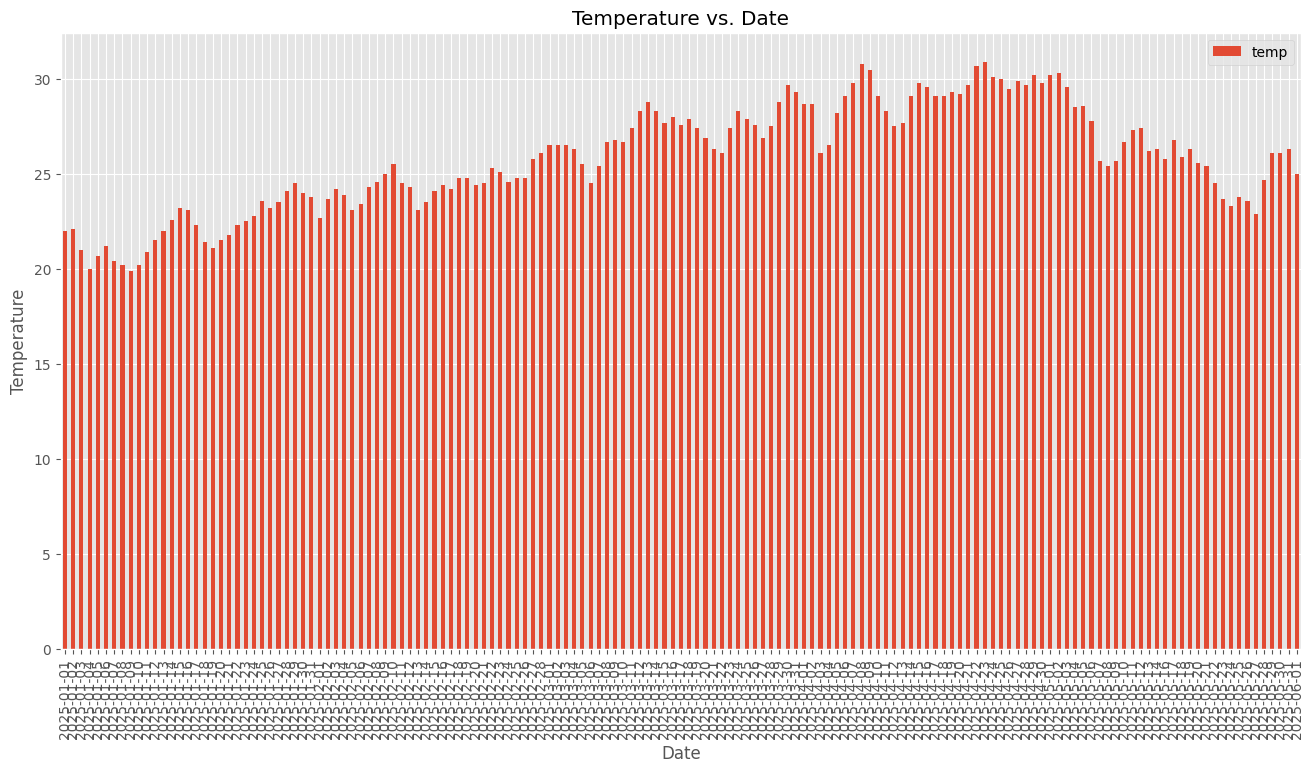

In [22]:
# Histogram of variables
data_df.plot(x='datetime', y ='temp', kind='bar')
plt.title(f"Temperature vs. Date")
plt.xlabel(f"Date")
plt.xticks(rotation=90)
plt.ylabel("Temperature")
plt.show()

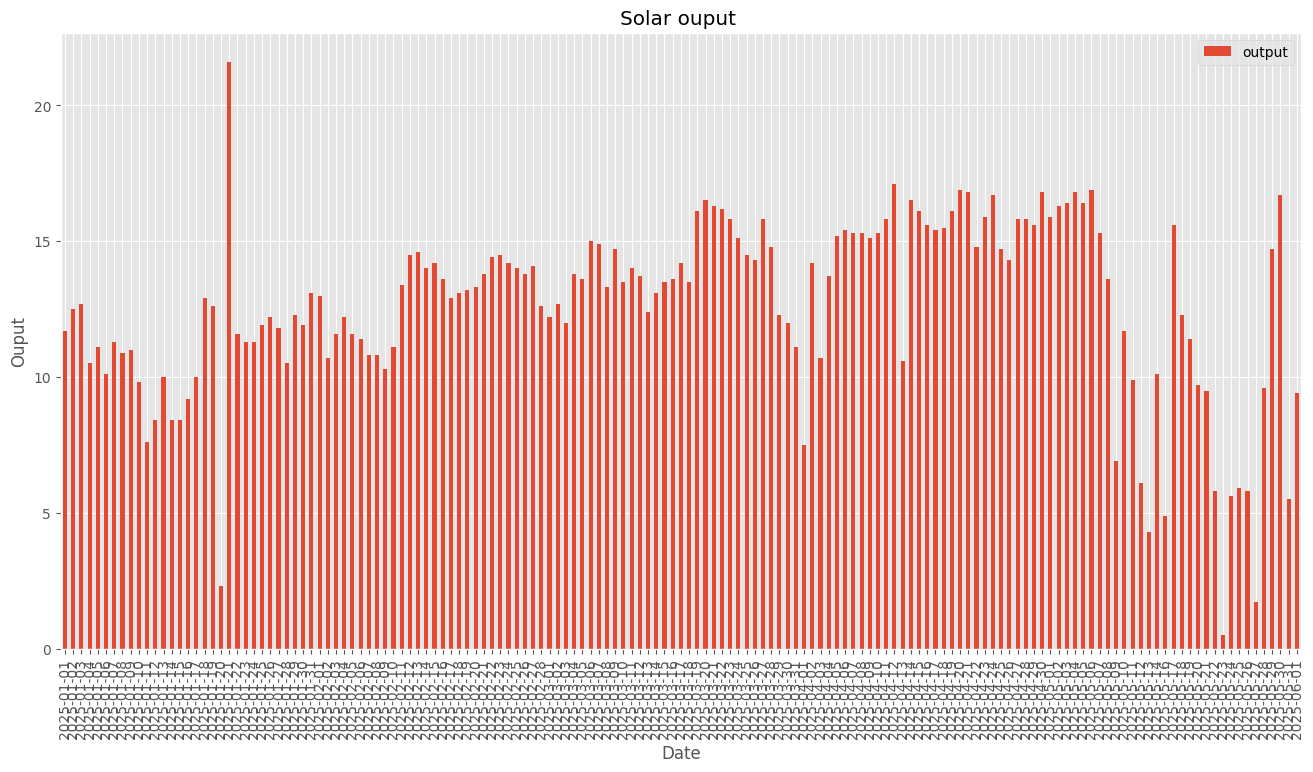

In [23]:
# Histogram of variables
data_df.plot(x='datetime', y ='output', kind='bar')
plt.title(f"Solar ouput ")
plt.xlabel(f"Date")
plt.xticks(rotation=90)
plt.ylabel("Ouput")
plt.show()

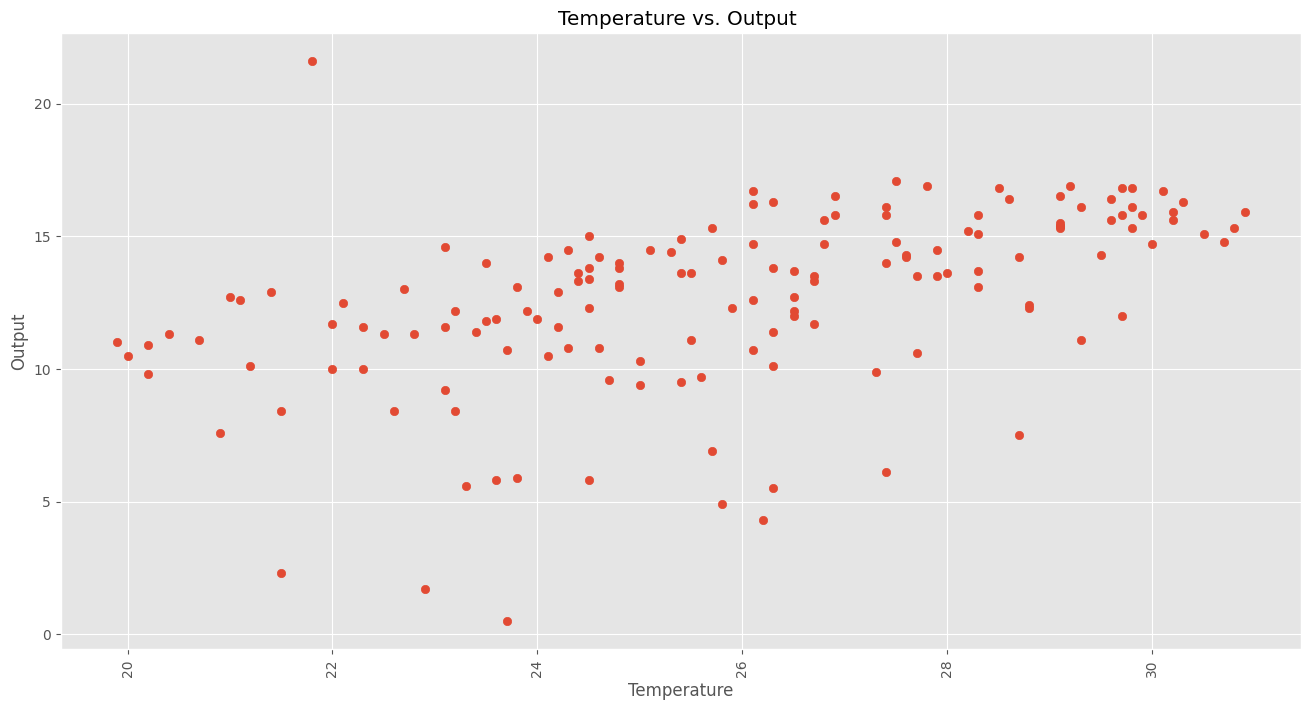

In [24]:
#data_df.plot(x='temp', y ='output', kind='bar')
plt.scatter(data_df['temp'], data_df['output'])
plt.title(f"Temperature vs. Output ")
plt.xlabel(f"Temperature")
plt.xticks(rotation=90)
plt.ylabel("Output")
plt.show()

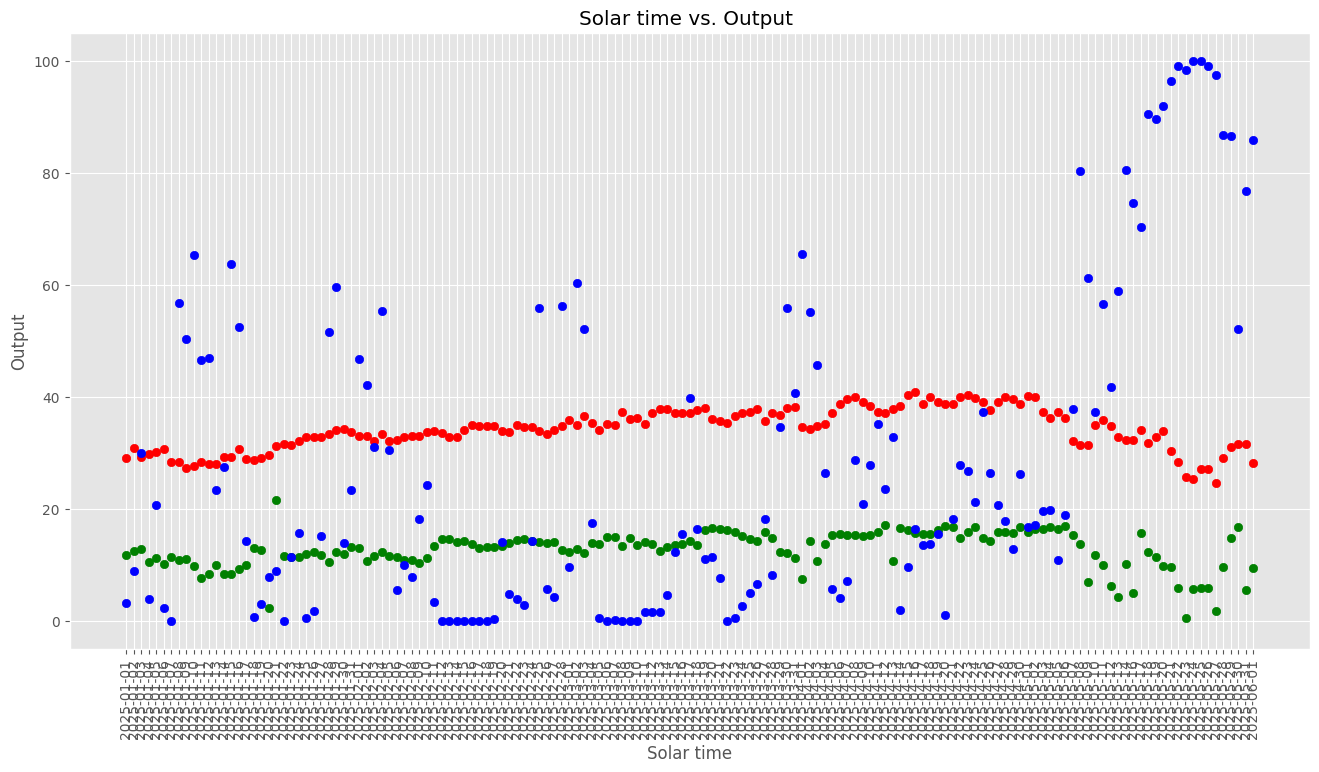

In [25]:
#plt.scatter(data_df['solartime'], data_df['output'])
plt.scatter(data_df['datetime'], data_df['output'], c='green')
plt.scatter(data_df['datetime'], data_df['tempmax'], c='red')
plt.scatter(data_df['datetime'], data_df['cloudcover'], c='blue')
plt.title(f"Solar time vs. Output ")
plt.xlabel(f"Solar time")
plt.xticks(rotation=90)
plt.ylabel("Output")
plt.show()

In [26]:
#sns.pairplot(data_df)

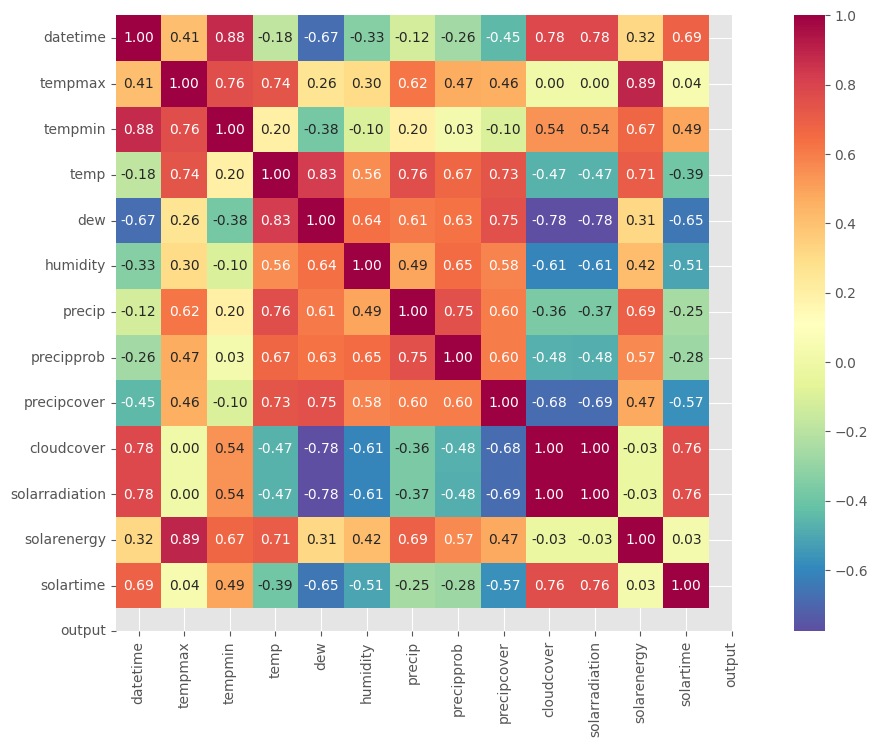

In [27]:
numeric_cols = data_df.select_dtypes(include=[np.number]).columns
corr_df = data_df[numeric_cols]
corrmat = corr_df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data_df.columns, 
                 xticklabels=data_df.columns, 
                 cmap="Spectral_r")
plt.show()

## Insights
- Max temperature of the day shows correlation with the ouput
- Cloud cover also exhibits inverse correlation with the output
- Solar radiation and energy are linearly related
- Although the solar time increased in May, the cloud cover went up and the output declined

## Trends 

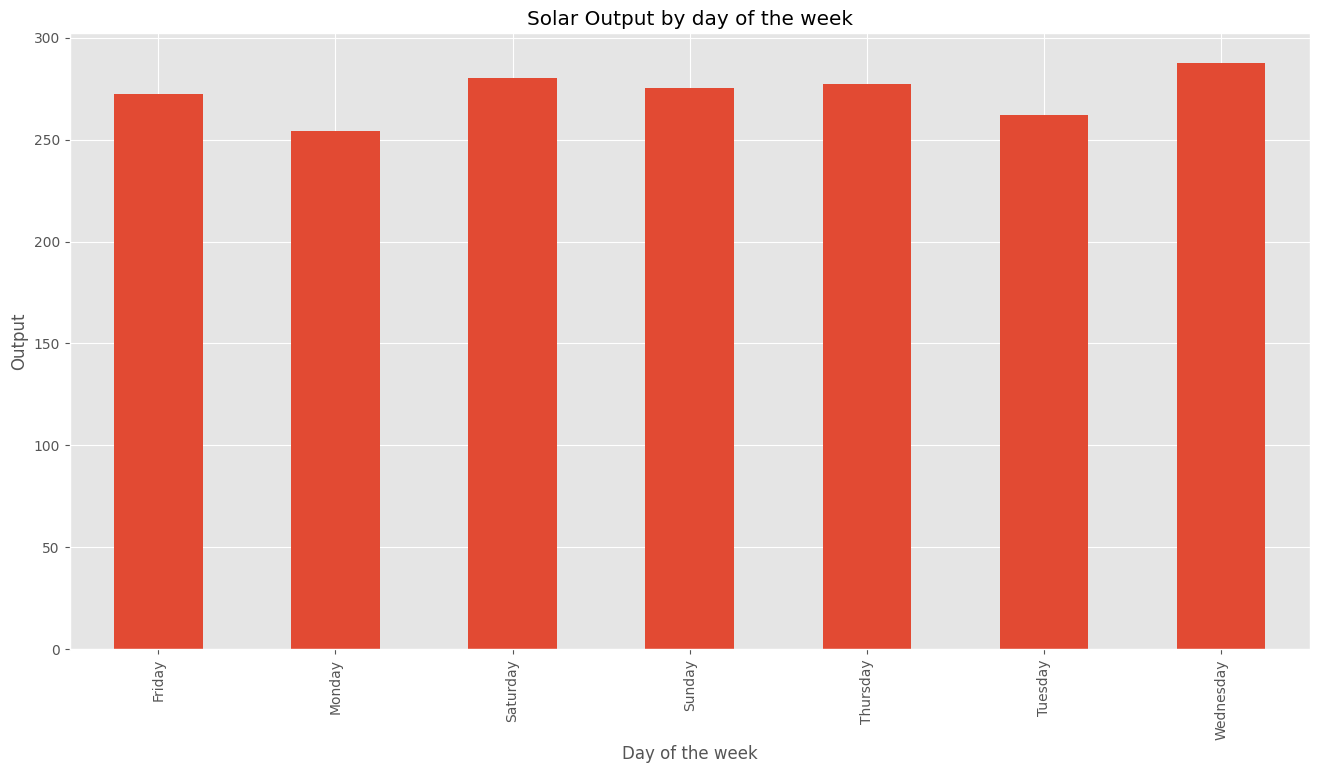

In [28]:
# Solar output by day of the week
dow_df = pd.DataFrame()
dow_df['date'] = data_df.apply(lambda row: str_to_date(row['datetime']), axis=1)
dow_df['dow'] = dow_df['date'].dt.day_name()
dow_df['output'] = data_df['output']
# Output summed by day of the week
dow_df.groupby(by='dow')['output'].sum().plot(kind='bar')
plt.title(f"Solar Output by day of the week")
plt.xlabel(f"Day of the week")
plt.xticks(rotation=90)
plt.ylabel("Output")
plt.show()

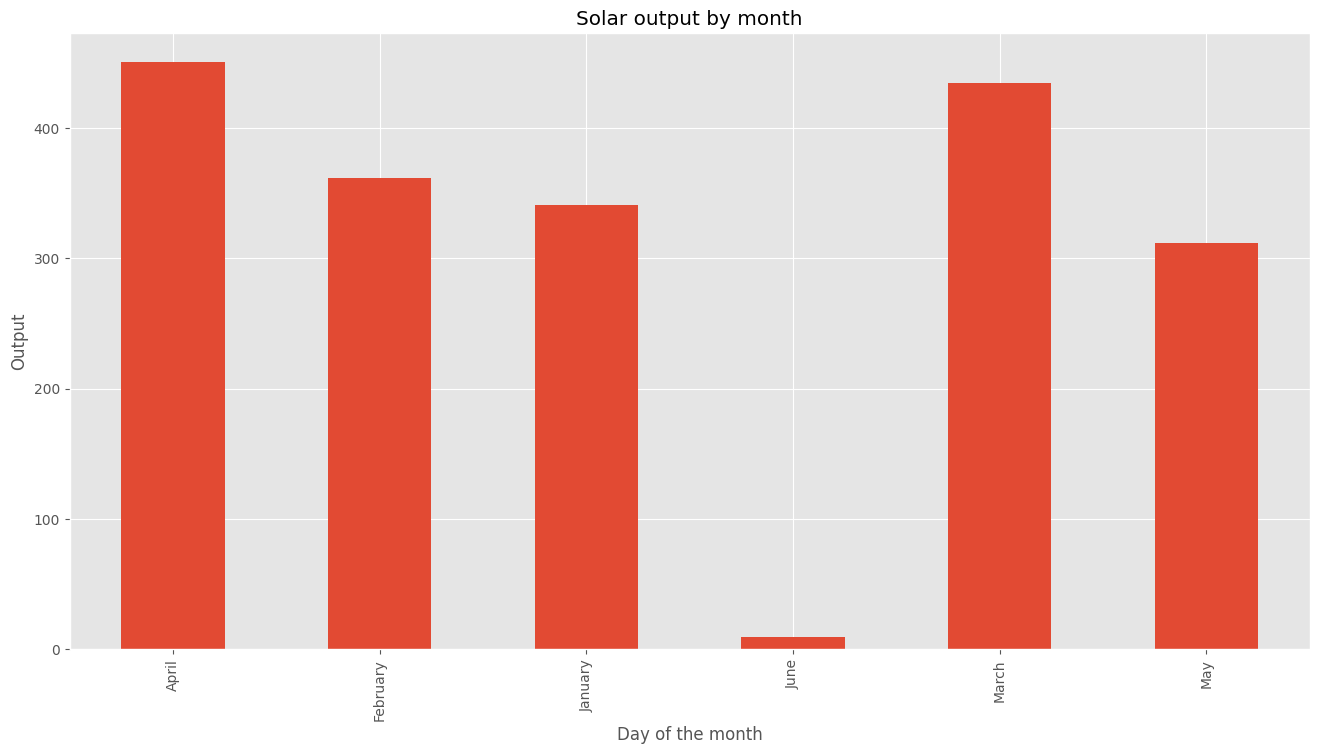

In [29]:
# Solar output by month
dow_df = pd.DataFrame()
dow_df['date'] = data_df.apply(lambda row: str_to_date(row['datetime']), axis=1)
dow_df['month'] = dow_df['date'].dt.month_name()
dow_df['output'] = data_df['output']
# Output summed by day of the week
dow_df.groupby(by='month')['output'].sum().plot(kind='bar')
plt.title(f"Solar output by month")
plt.xlabel(f"Day of the month")
plt.xticks(rotation=90)
plt.ylabel("Output")
plt.show()

## Feature Scaling

- Except precipitation (`precip`), precipitation cover (`precipcover`) and solar time (`solartime`) , other features are in double digit ranges.
- Regardless, z-score normalization should benefit for quicker convergence of gradient descent

In [30]:
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, LassoCV, Lars, LarsCV, LassoLarsCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [31]:
# copy of unnormalized data_df
# Drop the datetime
data_unnorm_df = data_df
numeric_cols = data_df.select_dtypes(include=[np.number]).columns
data_df = data_df[numeric_cols].apply(zscore)

In [32]:
data_df.head(5)

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime,output
0,-1.403946,-0.829721,-1.376138,0.242118,1.004365,-0.293308,-0.6003,-0.451987,-0.883851,-0.680943,-0.651917,-1.509529,-0.281256
1,-0.916350,-1.188969,-1.340224,-0.316047,0.483319,-0.293308,-0.6003,-0.451987,-0.686336,-0.583275,-0.588037,-1.502480,-0.042159
2,-1.322680,-1.787716,-1.735276,-1.127923,0.024799,-0.293308,-0.6003,-0.451987,0.044818,-0.513248,-0.502863,-1.495189,0.017616
3,-1.187236,-2.296651,-2.094413,-1.584603,-0.301724,-0.293308,-0.6003,-0.451987,-0.859595,-0.476393,-0.460277,-1.487654,-0.639903
4,-1.105970,-1.997277,-1.843017,-1.178665,-0.114147,-0.293308,-0.6003,-0.451987,-0.280909,-0.588803,-0.566744,-1.479148,-0.460580


In [33]:
# Another method of normalizing the data i.e. applying Z-score is using StandardScaler - This is just a demonstration and 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data_df))
data_norm.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.403946,-0.829721,-1.376138,0.242118,1.004365,-0.293308,-0.6003,-0.451987,-0.883851,-0.680943,-0.651917,-1.509529,-0.281256
1,-0.916350,-1.188969,-1.340224,-0.316047,0.483319,-0.293308,-0.6003,-0.451987,-0.686336,-0.583275,-0.588037,-1.502480,-0.042159
2,-1.322680,-1.787716,-1.735276,-1.127923,0.024799,-0.293308,-0.6003,-0.451987,0.044818,-0.513248,-0.502863,-1.495189,0.017616
3,-1.187236,-2.296651,-2.094413,-1.584603,-0.301724,-0.293308,-0.6003,-0.451987,-0.859595,-0.476393,-0.460277,-1.487654,-0.639903
4,-1.105970,-1.997277,-1.843017,-1.178665,-0.114147,-0.293308,-0.6003,-0.451987,-0.280909,-0.588803,-0.566744,-1.479148,-0.460580


In [34]:
# Split data 
X = data_df.drop('output', axis=1)
y = data_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [35]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 12)
X_test shape: (31, 12)
y_train shape: (120,)
y_test shape: (31,)


In [36]:
# Try PCA for visualization of input features X
pca_3 = PCA(n_components=3)
pca_3.fit(X)
pca_3.explained_variance_ratio_

array([0.51703249, 0.31315235, 0.04733253])

In [37]:
X_trans = pca_3.transform(X)
df_pca = pd.DataFrame(X_trans, columns=['principal_component_1', 'principal_component_2', 'principal_component_3'])

In [38]:
df_pca.describe()

,principal_component_1,principal_component_2,principal_component_3
count,1.510000e+02,151.000000,1.510000e+02
mean,-1.882232e-16,0.000000,-4.999680e-17
std,2.499150e+00,1.944963,7.561594e-01
min,-2.912994e+00,-3.844026,-2.494044e+00
25%,-1.652764e+00,-1.547267,-4.620818e-01
50%,-7.150055e-01,0.165627,1.158034e-02
75%,2.275732e-01,1.581578,3.697627e-01
max,9.154310e+00,3.415479,2.881221e+00


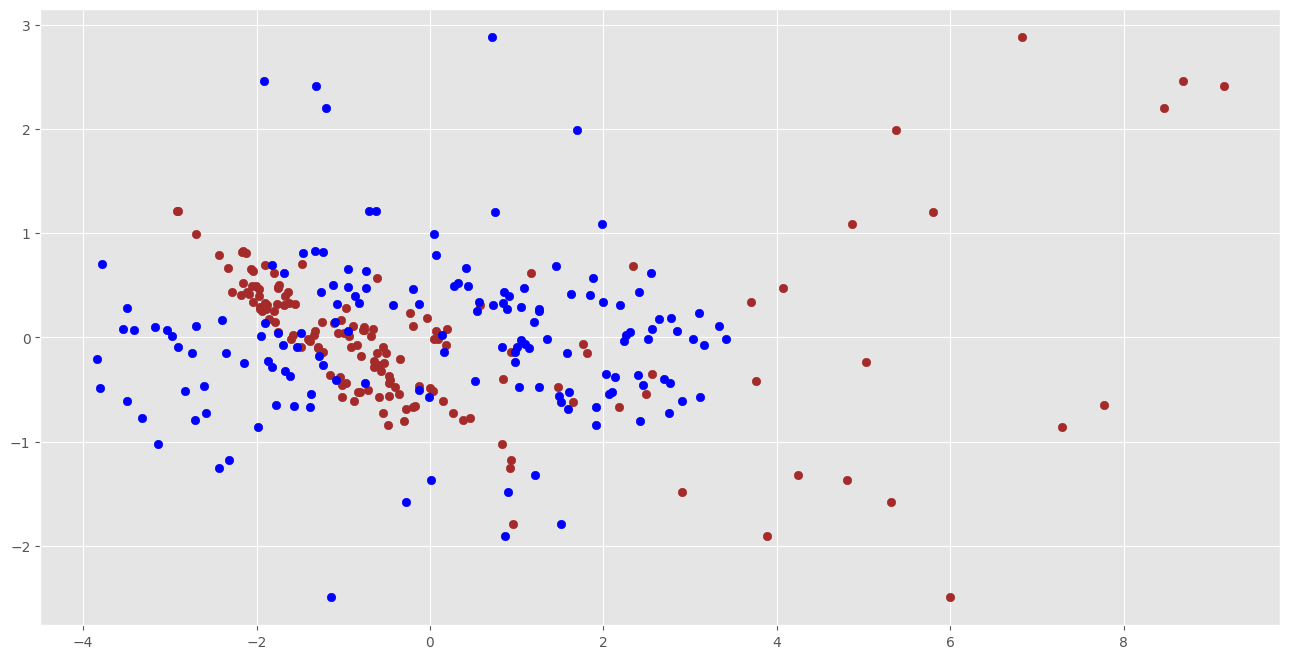

In [39]:
# Relation between pca1 w.r.t pca3 and pca2 w.r.t pca3
plt.scatter(df_pca['principal_component_1'], df_pca['principal_component_3'], c='brown')
plt.scatter(df_pca['principal_component_2'], df_pca['principal_component_3'], c= 'blue')

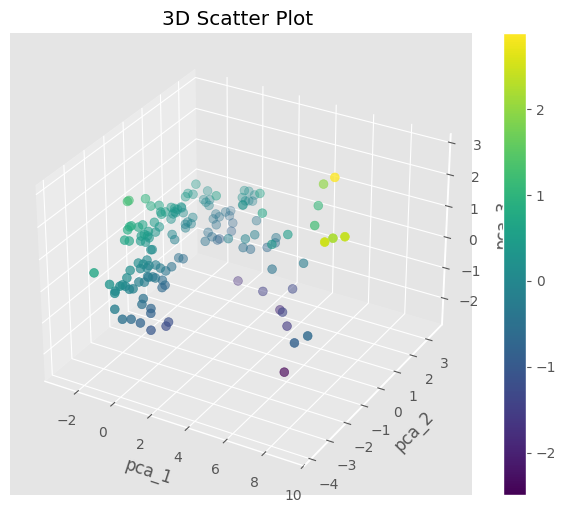

In [40]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['principal_component_1'], df_pca['principal_component_2'], df_pca['principal_component_3'], c=df_pca['principal_component_3'], cmap=sns.color_palette("viridis", as_cmap=True), s=40)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')
plt.colorbar(scatter)
plt.title('3D Scatter Plot ')
plt.show()

- With PCA, there are couple of clusters visible but do not have strong seggregation
- The data disperses as pca_1 increases

In [41]:
def predict_and_eval(model, X_train, y_train, X_test, y_test, show_intercept=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    tr_mse = mean_squared_error(y_train, y_train_pred)
    tr_r2 = r2_score(y_train, y_train_pred)

    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print(f"Train Mean Squared Error: {tr_mse}")
    print(f"Train R-squared: {tr_r2}")

    print(f"Test Mean Squared Error: {mse}")
    print(f"Test R-squared: {r2}")

    metrics = {
        'train_mse' : tr_mse,
        'train_r2' : tr_r2,
        'test_mse' : mse,
        'test_r2' : r2
        }
    if show_intercept:
        intercept = model.intercept_
        coefficients = model.coef_
        print(f"Intercept: {intercept}")
        print(f"Coefficients: {coefficients}")

    return metrics, y_train_pred, y_test_pred

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_metrics, lin_y_train_pred, lin_y_test_pred = predict_and_eval(lin_reg, X_train, y_train, X_test, y_test)

Train Mean Squared Error: 0.31151632789793715
Train R-squared: 0.7122062859151108
Test Mean Squared Error: 0.5104518490969554
Test R-squared: 0.2467514789758528


### Model metrics with variations of train test split
1. With train test split of 0.2:
```
Train Mean Squared Error: 0.3115163278979372
Train R-squared: 0.7122062859151108
Test Mean Squared Error: 0.5104518490969545
Test R-squared: 0.24675147897585414
```
2. With train test split of 0.3:
```
Train Mean Squared Error: 0.2572947243184856
Train R-squared: 0.7549984570806602
Test Mean Squared Error: 0.6199033407908575
Test R-squared: 0.21985463931483196
```
3. With train test split of 0.1:
```
Train Mean Squared Error: 0.32364206385071354
Train R-squared: 0.6782979417066
Test Mean Squared Error: 0.4308428072712628
Test R-squared: 0.511838216620878
```

- With 30% split, training score (R2) goes up but test score worsens compared to 20% (MSE goes down for training data while MSE for test data goes up). The model likely has high bias(underfitting).
- With 10% split, training score (R2) goes down but test score improves drastically (MSE goes up for training data while MSE for test data goes down). 
- The default split of 20% seems to be better to proceed.

In [43]:
reg = Ridge(alpha=10)
reg.fit(X_train, y_train)

Ridge(alpha=10)

In [44]:
ridge_metrics, ridge_y_train_pred, ridge_y_test_pred = predict_and_eval(reg, X_train, y_train, X_test, y_test)

Train Mean Squared Error: 0.33510412709918996
Train R-squared: 0.6904147464955743
Test Mean Squared Error: 0.4748387119934952
Test R-squared: 0.2993040221778588


#### Variantions of Ridge/L2 regularisation parameter alpha
- Train test split is constant at 20%
1. With alpha = 0.5
```
Train Mean Squared Error: 0.31466607682921327
Train R-squared: 0.7092963968910471
Test Mean Squared Error: 0.4875092717464424
Test R-squared: 0.28060670447523894
```
- Compared to Linear regression, Ridge regression shows slight improvement in test data R2 score from 0.24 to 0.28
2. With alpha = 1
```
Train Mean Squared Error: 0.31757934373904917
Train R-squared: 0.7066049812925138
Test Mean Squared Error: 0.481789822687933
Test R-squared: 0.2890466122785249
```
- No significant change seen
3. With alpha = 10
```
Train Mean Squared Error: 0.33510412709918996
Train R-squared: 0.6904147464955743
Test Mean Squared Error: 0.47483871199349514
Test R-squared: 0.2993040221778589
```
- Minor improvement seen in test data R2 score, which R2 score for training data slightly decreased
4. With alpha = 25
```
Train Mean Squared Error: 0.34530122278514125
Train R-squared: 0.6809941807738944
Test Mean Squared Error: 0.4792106901509044
Test R-squared: 0.2928525104694688
```
5. With alpha = 100
```
Train Mean Squared Error: 0.3728966364064952
Train R-squared: 0.6555002150758904
Test Mean Squared Error: 0.4804949554812352
Test R-squared: 0.29095738370602253
```
- Even though alpha is exponentially higher than starting alpha, the improvement has plateaued around 0.29 for test data

- Learning rate Alpha = 10 seems to have the right balance of train test R2 scores

In [45]:
sgd_reg = SGDRegressor(random_state=42, max_iter=1000)
sgd_reg.fit(X_train, y_train)

sgd_metrics, sgd_y_train_pred, sgd_y_test_pred = predict_and_eval(sgd_reg, X_train, y_train, X_test, y_test)

Train Mean Squared Error: 0.3440212093430444
Train R-squared: 0.6821767185402625
Test Mean Squared Error: 0.48817464109890596
Test R-squared: 0.27962485186452823


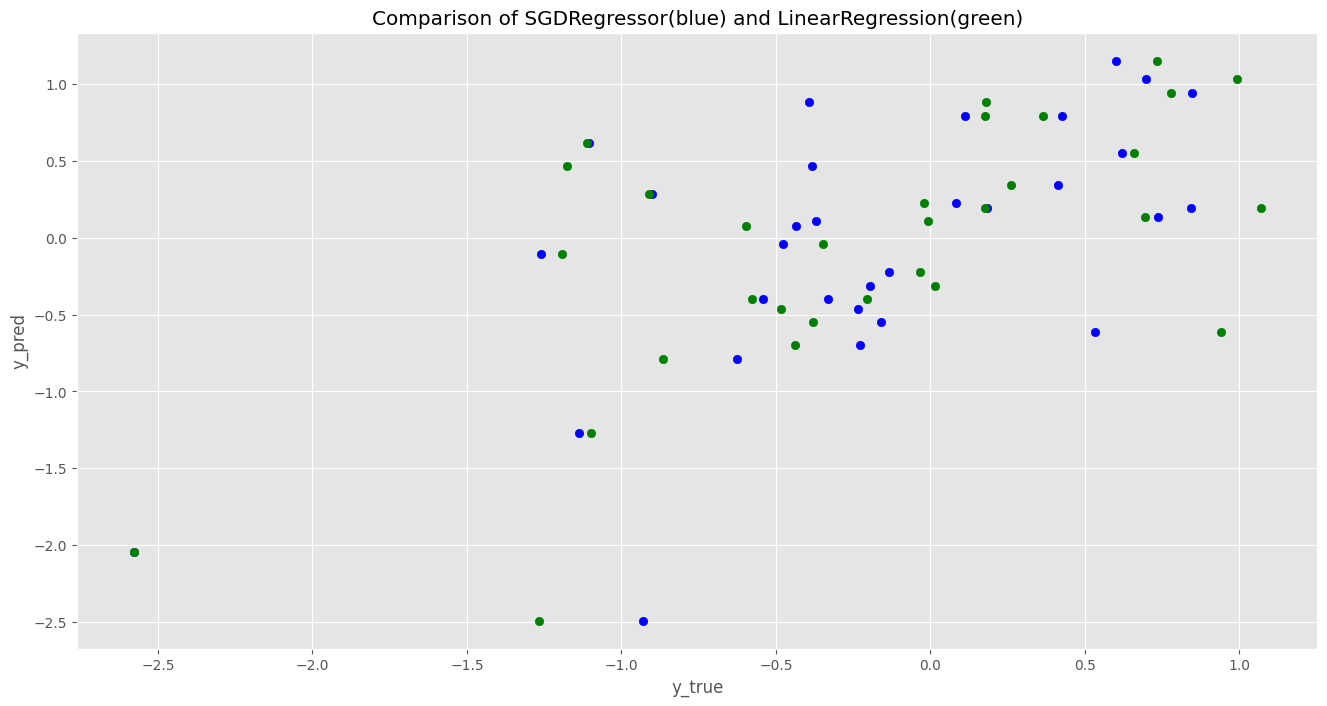

In [46]:
# Plot predictions vs output for test dataset
plt.scatter(sgd_y_test_pred, y_test,c= 'blue')
plt.scatter(lin_y_test_pred, y_test,c= 'green')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Comparison of SGDRegressor(blue) and LinearRegression(green)')
plt.show()

In [47]:
# It seems the linear models have high bias(underfitting). Let's try adding more features using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly  = poly.fit_transform(X)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [48]:
# linear regression with polynomial features
lin_poly_reg = LinearRegression()
lin_poly_reg.fit(X_poly_train, y_poly_train)
lin_poly_metrics, lin_poly_y_train_pred, lin_poly_y_test_pred = predict_and_eval(lin_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

Train Mean Squared Error: 0.07909369115970363
Train R-squared: 0.9177059475339087
Test Mean Squared Error: 86.59557398261714
Test R-squared: -75.8116358193375


- With degree=2, training score improved significantly but the testing score got worse exponentially
```
Train Mean Squared Error: 0.07909369115970194
Train R-squared: 0.9177059475339104
Test Mean Squared Error: 86.59557398163655
Test R-squared: -75.81163581846769
```
- With degree=3, the testing score got even worse 
```
Train Mean Squared Error: 1.235899138454365e-27
Train R-squared: 1.0
Test Mean Squared Error: 915.9201516191432
Test R-squared: -811.4355771333586
Intercept: 0.6768605829176095
```
- This indicates that with higher degress, there is high variance (overfitting). Regularization should help.

In [49]:
# Let's try Ridge regressor where alpha (regularization factor) can be added
ridge_poly_reg = Ridge(alpha=10, fit_intercept=True)
ridge_poly_reg.fit(X_poly_train, y_poly_train)
ridge_poly_metrics, ridge_poly_y_train_pred, ridge_poly_y_test_pred = predict_and_eval(ridge_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

Train Mean Squared Error: 0.20430455234897074
Train R-squared: 0.7874286899050003
Test Mean Squared Error: 0.5847221851184715
Test R-squared: 0.48134222716945063


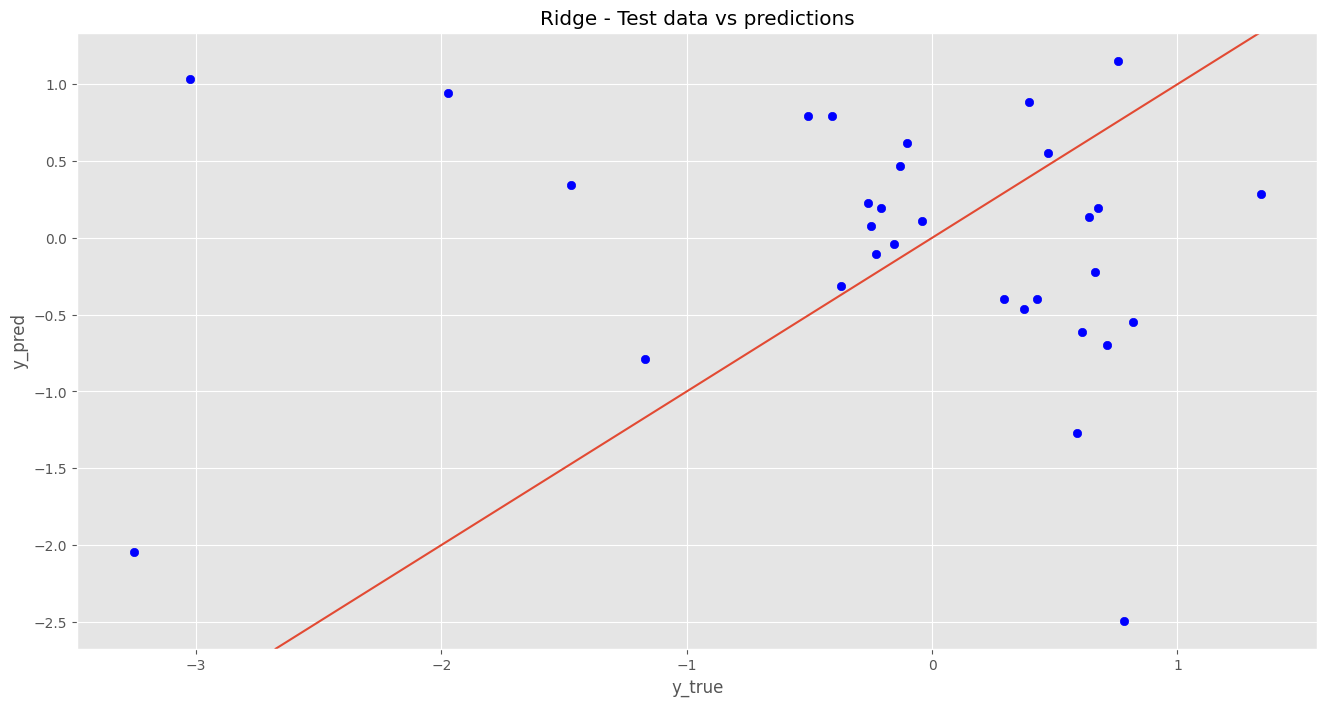

In [50]:
plt.scatter(ridge_poly_y_test_pred, y_test,c= 'blue')
ax = plt.subplot()
ax.axline((0, 0), slope=1)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Ridge - Test data vs predictions')
plt.show()

In [51]:
# Let's try a few variations of alpha
ridge_alphas = [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
r_alpha_metrics = []
for ralpha in ridge_alphas:
    print('-- Ridge with alpha ', ralpha)
    r_poly_reg = Ridge(alpha=ralpha, fit_intercept=False)
    r_poly_reg.fit(X_poly_train, y_poly_train)
    r_poly_metrics, _, _ = predict_and_eval(r_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)
    r_poly_metrics['alpha'] = ralpha
    r_alpha_metrics.append(r_poly_metrics)

-- Ridge with alpha  1
Train Mean Squared Error: 0.14775448976639732
Train R-squared: 0.8462669328659257
Test Mean Squared Error: 0.917806214495599
Test R-squared: 0.18589145543729246
-- Ridge with alpha  3
Train Mean Squared Error: 0.17106333575156832
Train R-squared: 0.8220149430257427
Test Mean Squared Error: 0.6853500959991514
Test R-squared: 0.39208368786605496
-- Ridge with alpha  6
Train Mean Squared Error: 0.18936581764580532
Train R-squared: 0.8029718893614147
Test Mean Squared Error: 0.6129088028194014
Test R-squared: 0.45634025404023126
-- Ridge with alpha  10
Train Mean Squared Error: 0.2046861760712266
Train R-squared: 0.7870316245744897
Test Mean Squared Error: 0.5849537151710029
Test R-squared: 0.481136856372095
-- Ridge with alpha  30
Train Mean Squared Error: 0.2430190540888475
Train R-squared: 0.7471476865700191
Test Mean Squared Error: 0.5642840087299309
Test R-squared: 0.4994712110120093
-- Ridge with alpha  60
Train Mean Squared Error: 0.27224047526624345
Train R-s

In [53]:
r_alpha_df = pd.DataFrame(r_alpha_metrics)
r_alpha_df.head(10)

,train_mse,train_r2,test_mse,test_r2,alpha
0,0.147754,0.846267,0.917806,0.185891,1
1,0.171063,0.822015,0.685350,0.392084,3
2,0.189366,0.802972,0.612909,0.456340,6
3,0.204686,0.787032,0.584954,0.481137,10
4,0.243019,0.747148,0.564284,0.499471,30
5,0.272240,0.716744,0.563882,0.499828,60
6,0.298073,0.689866,0.568306,0.495904,100
7,0.376138,0.608642,0.599273,0.468436,300
8,0.446483,0.535451,0.637946,0.434132,600
9,0.505581,0.473962,0.672936,0.403095,1000


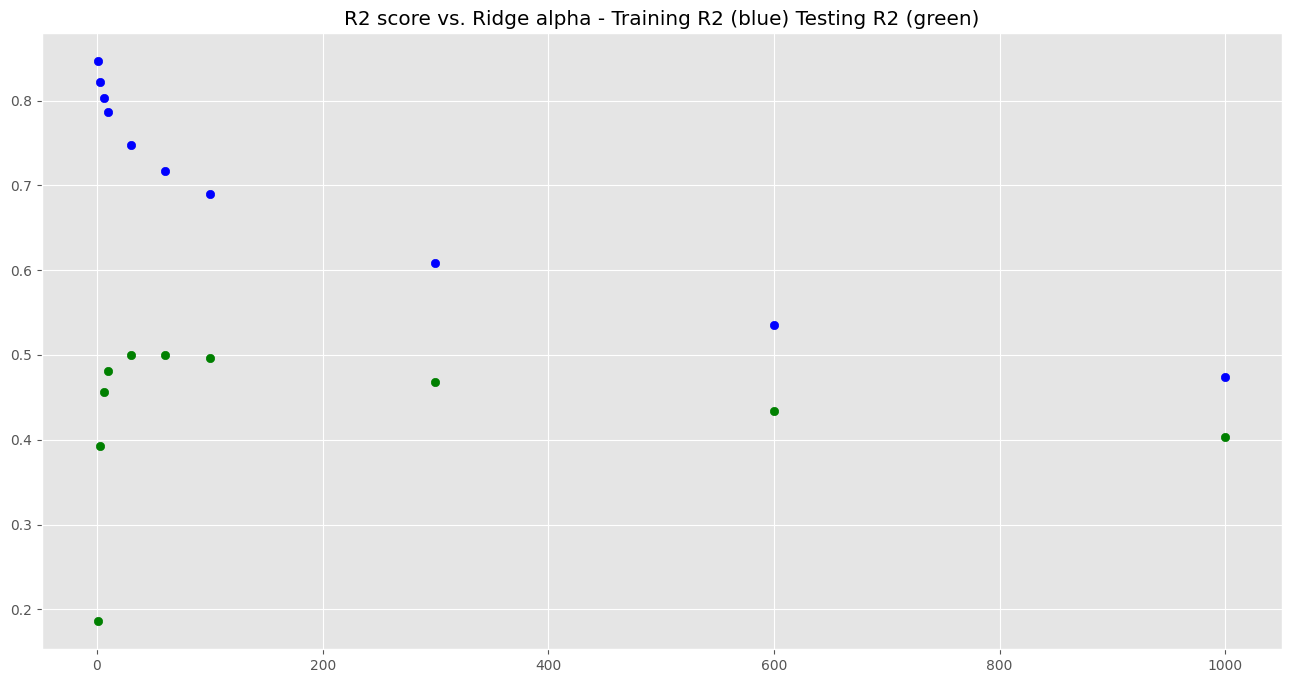

In [54]:
# Scatter plot of R2 scores for training and test datasets as alpha varies
plt.scatter(r_alpha_df['alpha'], r_alpha_df['train_r2'], c='blue')
plt.scatter(r_alpha_df['alpha'], r_alpha_df['test_r2'], c='green')
plt.title(f"R2 score vs. Ridge alpha - Training R2 (blue) Testing R2 (green)")
plt.show()

- As expected, adding regularisation does help in case of overfitting
- As seen from the above alpha variations, the R2 scores for train and test data converge after alpha = 30 and start degrading a bit with increasing alpha

In [55]:
# Let's try Lasso regressor where alpha (regularization factor) can be added
lasso_poly_reg = Lasso(alpha=0.01, fit_intercept=False, max_iter=10000)
lasso_poly_reg.fit(X_poly_train, y_poly_train)
lass_metrics, lasso_poly_y_train_pred, lasso_poly_y_test_pred = predict_and_eval(lasso_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

Train Mean Squared Error: 0.20885116945617202
Train R-squared: 0.7826981034160253
Test Mean Squared Error: 0.5685826072039438
Test R-squared: 0.4956582865710244


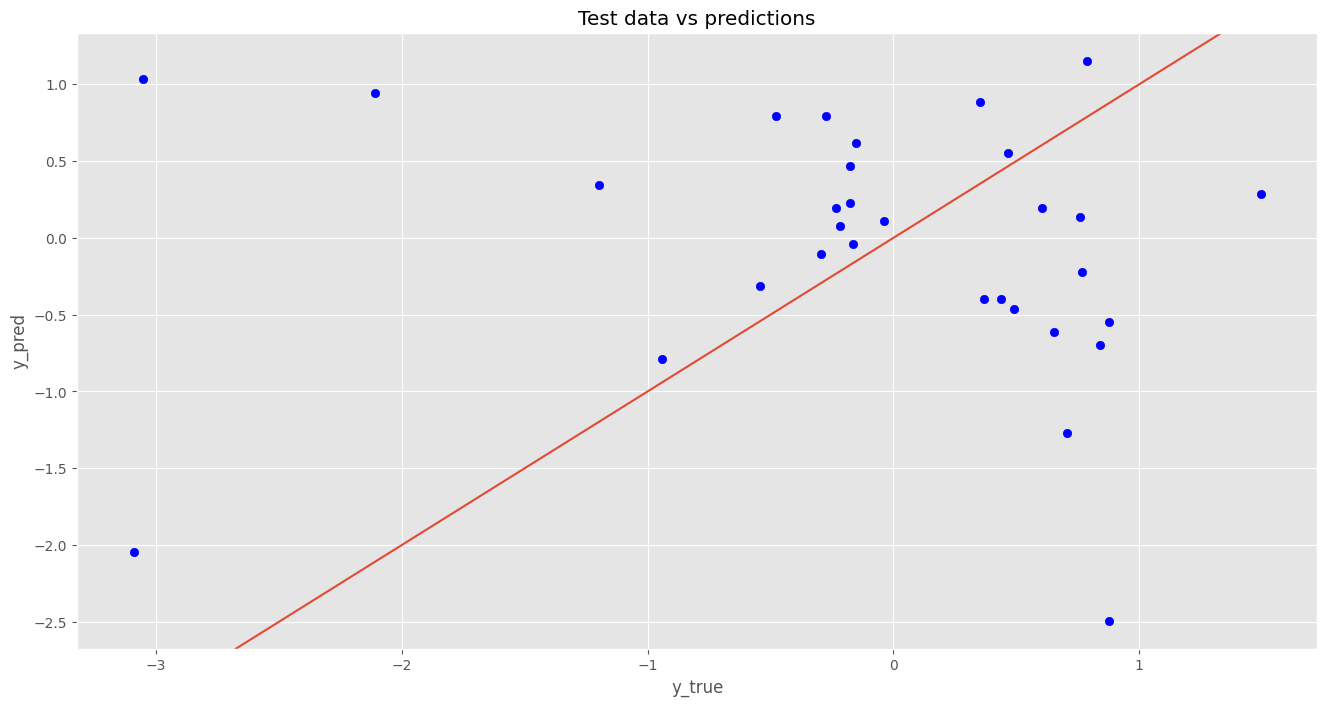

In [56]:
plt.scatter(lasso_poly_y_test_pred, y_test,c= 'blue')
ax = plt.subplot()
ax.axline((0, 0), slope=1)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Test data vs predictions')
plt.show()

In [58]:
# Let's try Lasso regressor where alpha (regularization factor) and cross-validation both can be applied
lassocv_poly_reg = LassoCV(eps=0.01, cv=5, fit_intercept=False, random_state=12, max_iter=10000)
lassocv_poly_reg.fit(X_poly_train, y_poly_train)
lassocv_metrics, lassocv_poly_y_train_pred, lassocv_poly_y_test_pred = predict_and_eval(lassocv_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

Train Mean Squared Error: 0.338453438024481
Train R-squared: 0.6478517492643469
Test Mean Squared Error: 0.5653933577747301
Test R-squared: 0.49848720096499755


In [59]:
# Let's try a few variations of alpha with LassoCV
lasso_eps = [0.0003, 0.0006, 0.001, 0.003, 0.0045, 0.006, 0.01, 0.03, 0.06, 0.1]
l_alpha_metrics = []
for lalpha in lasso_eps:
    print('-- LassoCV with alpha ', lalpha)
    l_poly_reg = LassoCV(eps=lalpha, cv=5, fit_intercept=False, random_state=12, max_iter=50000)
    l_poly_reg.fit(X_poly_train, y_poly_train)
    l_poly_metrics, _, _ = predict_and_eval(l_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)
    l_poly_metrics['alpha'] = lalpha
    l_alpha_metrics.append(l_poly_metrics)

-- LassoCV with alpha  0.0003


/Users/macos/Documents/DS/MachineLearning/Projects/SolarOpPrediction/py3env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013110585166506539, tolerance: 0.008990383709521906
  model = cd_fast.enet_coordinate_descent_gram(
/Users/macos/Documents/DS/MachineLearning/Projects/SolarOpPrediction/py3env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01071265442366176, tolerance: 0.009864964149533959
  model = cd_fast.enet_coordinate_descent_gram(
/Users/macos/Documents/DS/MachineLearning/Projects/SolarOpPrediction/py3env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

Train Mean Squared Error: 0.16606322468876458
Train R-squared: 0.8272173731577214
Test Mean Squared Error: 0.671583693555084
Test R-squared: 0.40429470330765727
-- LassoCV with alpha  0.0006


/Users/macos/Documents/DS/MachineLearning/Projects/SolarOpPrediction/py3env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010162020405761751, tolerance: 0.009864964149533959
  model = cd_fast.enet_coordinate_descent_gram(
/Users/macos/Documents/DS/MachineLearning/Projects/SolarOpPrediction/py3env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010047921113525149, tolerance: 0.009864964149533959
  model = cd_fast.enet_coordinate_descent_gram(


Train Mean Squared Error: 0.16608472795893536
Train R-squared: 0.8271949998025564
Test Mean Squared Error: 0.6714902337850578
Test R-squared: 0.4043776035933052
-- LassoCV with alpha  0.001
Train Mean Squared Error: 0.16625514375078815
Train R-squared: 0.8270176884909947
Test Mean Squared Error: 0.6707503251490238
Test R-squared: 0.4050339141883713
-- LassoCV with alpha  0.003
Train Mean Squared Error: 0.1792698887061834
Train R-squared: 0.8134763290160716
Test Mean Squared Error: 0.6239903766764284
Test R-squared: 0.4465107237736854
-- LassoCV with alpha  0.0045
Train Mean Squared Error: 0.19926141784116985
Train R-squared: 0.7926758843359761
Test Mean Squared Error: 0.5892187963695298
Test R-squared: 0.4773536622815181
-- LassoCV with alpha  0.006
Train Mean Squared Error: 0.3383297340032423
Train R-squared: 0.6479804587108883
Test Mean Squared Error: 0.5656116312124995
Test R-squared: 0.49829358899339327
-- LassoCV with alpha  0.01
Train Mean Squared Error: 0.338453438024481
Train R

In [60]:
l_alpha_df = pd.DataFrame(l_alpha_metrics)
l_alpha_df.head(10)

,train_mse,train_r2,test_mse,test_r2,alpha
0,0.166063,0.827217,0.671584,0.404295,0.0003
1,0.166085,0.827195,0.671490,0.404378,0.0006
2,0.166255,0.827018,0.670750,0.405034,0.0010
3,0.179270,0.813476,0.623990,0.446511,0.0030
4,0.199261,0.792676,0.589219,0.477354,0.0045
5,0.338330,0.647980,0.565612,0.498294,0.0060
6,0.338453,0.647852,0.565393,0.498487,0.0100
7,0.337751,0.648582,0.566660,0.497363,0.0300
8,0.362863,0.622454,0.530544,0.529399,0.0600
9,0.411565,0.571782,0.505049,0.552013,0.1000


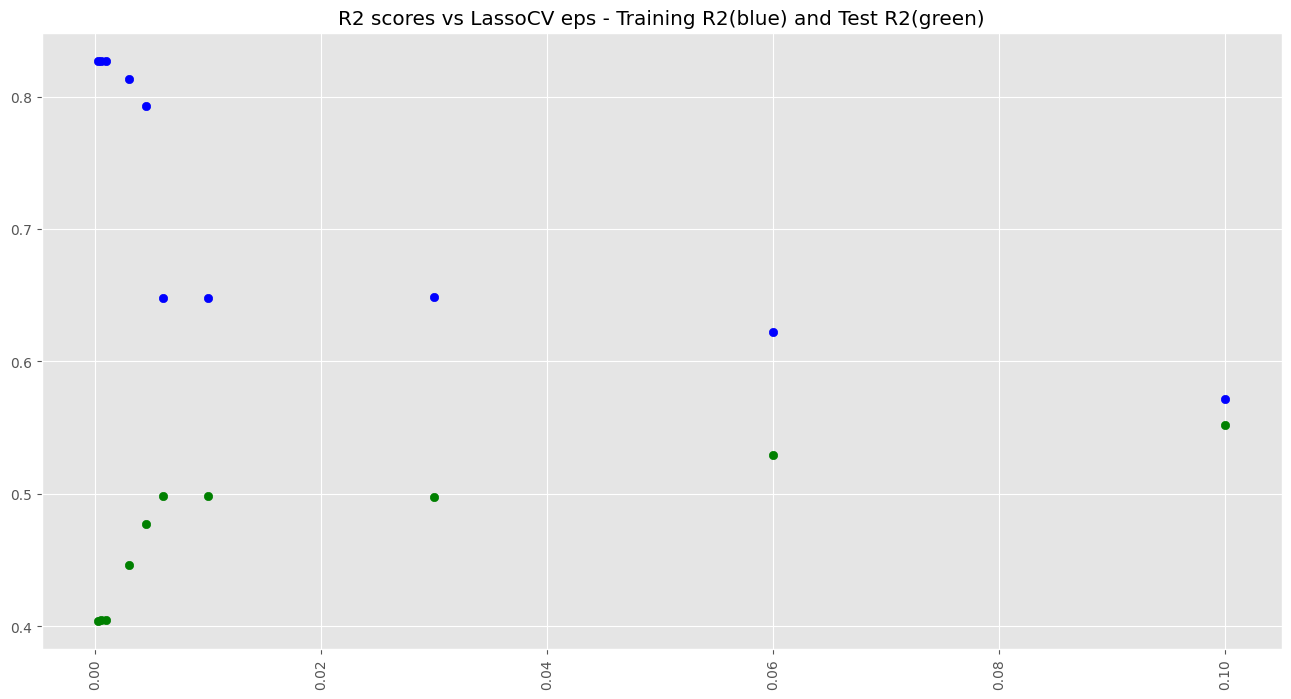

In [61]:
# Scatter plot of R2 scores for training and test datasets as alpha varies
plt.scatter(x=l_alpha_df['alpha'], y=l_alpha_df['train_r2'], c='blue')
plt.scatter(x=l_alpha_df['alpha'], y=l_alpha_df['test_r2'], c='green')
plt.xticks(rotation=90)
plt.title('R2 scores vs LassoCV eps - Training R2(blue) and Test R2(green)')
plt.show()

- With polynomial freatures, Ridge and Lasso have generated better outcomes than before.
- However, in both cases the R2 scores plateau around 50%

With linear regression, the test data still reached barely 50% accuracy. Regardless, let's check the predictions with Ridge and Lasso models 

In [62]:
# read new features for prediction
june_weather_df = pd.read_csv('june_weather_data.csv')
# Drop unused columns
june_weather_df = june_weather_df.drop(['name', 'feelslikemax', 'feelslikemin','feelslike', 'severerisk','moonphase', 'icon', 'stations', 'description', 'preciptype', 'winddir', 'sealevelpressure', 'visibility','uvindex', 'snow', 'snowdepth', 'windgust', 'windspeed', 'conditions'], axis=1)
june_weather_df.isnull().sum()

datetime          0
tempmax           0
tempmin           0
temp              0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
cloudcover        0
solarradiation    0
solarenergy       0
sunrise           0
sunset            0
dtype: int64

In [63]:
june_weather_df['solartime'] = june_weather_df.apply(lambda row: tm_diff_min(row['sunset'], row['sunrise']), axis=1)
# Now sunrise and sunset times can be dropped
june_weather_df = june_weather_df.drop(['sunrise', 'sunset'], axis=1)

In [64]:
numeric_cols = june_weather_df.select_dtypes(include=[np.number]).columns
june_data_df = june_weather_df[numeric_cols].apply(zscore)
june_data_df.head(5)

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime
0,1.126050,0.602947,1.110927,0.204576,-1.702219,-0.532928,0.583139,-0.119175,-0.936234,0.706614,0.705069,-2.552363
1,1.305147,1.440574,1.484817,0.308658,-2.299670,-0.562243,0.583139,0.062862,-0.866468,0.448750,0.427445,-2.182930
2,-0.008234,-0.129977,-0.073059,0.308658,0.388858,0.334798,0.583139,-0.846885,-0.622285,0.174173,0.149821,-1.857478
3,1.364846,-2.328747,0.487776,0.100493,-0.731362,-0.321859,0.583139,-0.301212,-2.942022,0.985966,0.982693,-1.549617
4,1.663342,0.812354,0.923982,0.829071,-0.706468,0.276168,0.583139,-1.028485,-2.250170,1.011036,1.024336,-1.241756


In [65]:
# Apply polynomial features similar to the training data
june_poly_df  = poly.fit_transform(june_data_df)
ridge_poly = Ridge(alpha=30, fit_intercept=False)
ridge_poly.fit(X_poly_train, y_poly_train)
june_preds_ridge = ridge_poly.predict(june_poly_df)
lassocv_poly = LassoCV(eps=0.01, cv=5, fit_intercept=False, random_state=12, max_iter=50000)
lassocv_poly.fit(X_poly_train, y_poly_train)
june_preds_lasso = lassocv_poly.predict(june_poly_df)

In [66]:
# Use scaler based on original solar output to reverse transform predictions
jscaler = StandardScaler()
jscaler.fit_transform(pd.DataFrame(solar_df['Daily yield(kWh)']))
result_df = pd.DataFrame(june_weather_df['datetime'])
result_df['ridge_pred'] = jscaler.inverse_transform(pd.DataFrame(june_preds_ridge))
result_df['lasso_pred'] = jscaler.inverse_transform(pd.DataFrame(june_preds_lasso))
result_df

,datetime,ridge_pred,lasso_pred
0,2025-06-02,11.282571,14.901117
1,2025-06-03,11.257363,14.913430
2,2025-06-04,11.722338,13.219536
3,2025-06-05,15.672569,16.271025
4,2025-06-06,15.201188,16.608353
5,2025-06-07,12.934131,14.257872
6,2025-06-08,14.294896,15.177148
7,2025-06-09,14.358411,14.502389
8,2025-06-10,15.712965,15.611631
9,2025-06-11,13.407578,14.693734


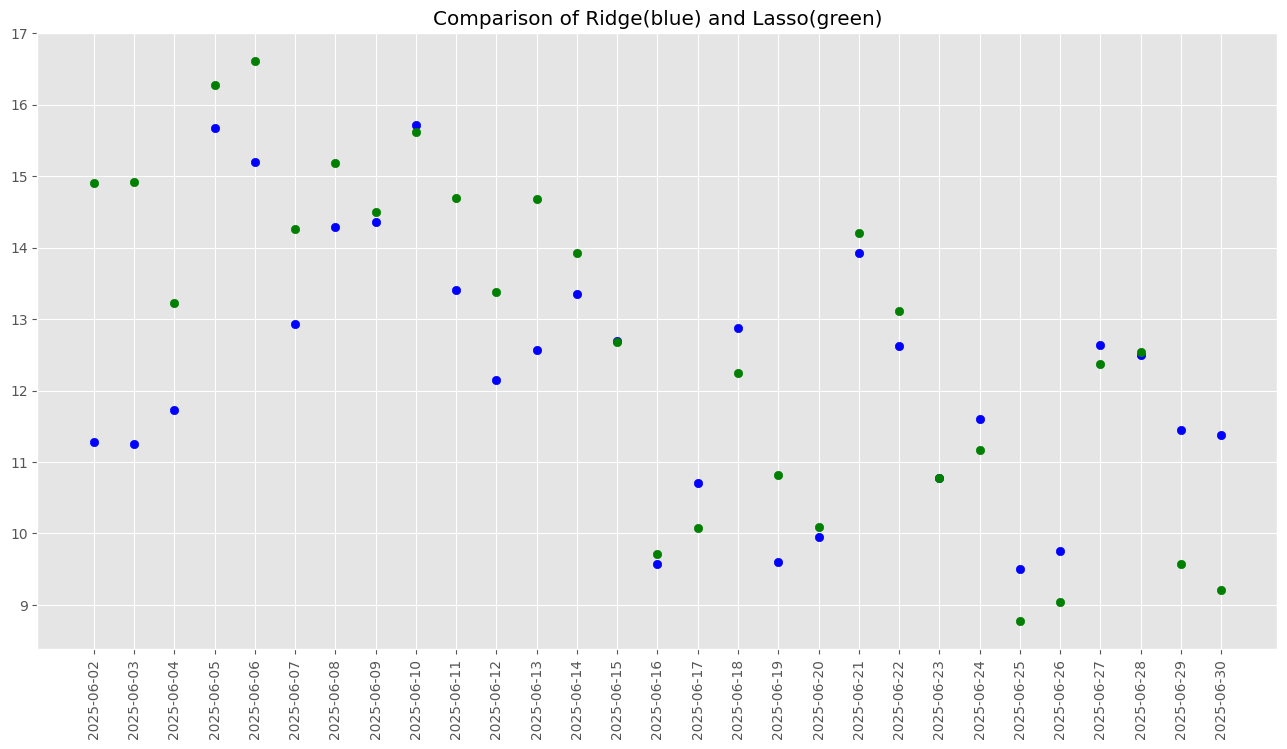

In [67]:
# Plot predictions vs output
plt.scatter(result_df['datetime'], result_df['ridge_pred'], c= 'blue')
plt.scatter(result_df['datetime'], result_df['lasso_pred'], c= 'green')
#plt.xlabel('Dates')
#plt.ylabel('Predictions')
plt.xticks(rotation=90)
plt.title('Comparison of Ridge(blue) and Lasso(green)')
plt.show()

### Observations:
- Ridge (L2 regularization) shows better predictions, possibly because the it does not zero out some features as opposed to Lasso.
- Eyeballing the prections also indicates that Ridge predictions are likely to be more inline with original data.

Best R2 score seen with Ridge
```
-- Ridge with alpha  10
Train Mean Squared Error: 0.2046861760712266
Train R-squared: 0.7870316245744897
Test Mean Squared Error: 0.5849537151710029
Test R-squared: 0.481136856372095
```

Best R2 score seen with LassoCV
```
-- LassoCV with alpha  0.0045
Train Mean Squared Error: 0.19926141784116985
Train R-squared: 0.7926758843359761
Test Mean Squared Error: 0.5892187963695298
Test R-squared: 0.4773536622815181
```